## Synthesis Data

In [1]:
import numpy as np
from prettytable import PrettyTable 
import matplotlib.pyplot as plt

In [2]:
x = np.random.normal(0, 1, 1000)
y = np.sin(2*x) + np.random.normal(0, 0.1, 1000)

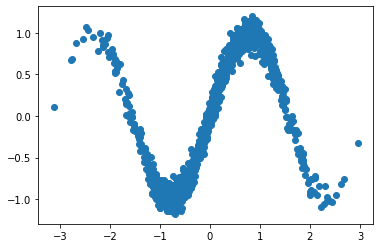

In [3]:
plt.scatter(x, y)
plt.show()

## Simulation with tensorflow

Assuming $$\hat{y}=\beta_0+\beta_1x$$

In [ ]:
W1 = tf.Variable(0.0, name = "W1")
W2 = tf.Variable(0.0, name = "W2")
W3 = tf.Variable(0.0, name = "W3")
b = tf.Variable(0.0, name = "b")

In [5]:
lr = 0.001
epochs = 10000

In [6]:
def mse_model(x, y, b0, b1, b2, b3):
    predy = b0 + b1*x + b2*(x**2) + b3*(x**3)
    error = (predy - y)**2

    return tf.reduce_mean(error)

def gradient_lr(x, y, b0, b1, b2, b3):
    with tf.GradientTape() as tape:
        loss = mse_model(x, y, b0, b1, b2, b3)
        
    return tape.gradient(loss, [b3, b2, b1, b0])

In [7]:
for e in range(0, epochs+1):
    db3, db2, db1, db0 = gradient_lr(x, y, b, W1, W2, W3)

    W3.assign_sub(db3*lr)
    W2.assign_sub(db2*lr)
    W1.assign_sub(db1*lr)
    b.assign_sub(db0*lr)

    if e % 1000 == 0:
        loss = mse_model(x, y, b, W1, W2, W3)
        print('Epoch ', e, '; Loss: ',loss)

Epoch  0 ; Loss:  tf.Tensor(0.5191181, shape=(), dtype=float32)
Epoch  1000 ; Loss:  tf.Tensor(0.27773526, shape=(), dtype=float32)
Epoch  2000 ; Loss:  tf.Tensor(0.21942319, shape=(), dtype=float32)
Epoch  3000 ; Loss:  tf.Tensor(0.20481011, shape=(), dtype=float32)
Epoch  4000 ; Loss:  tf.Tensor(0.20114382, shape=(), dtype=float32)
Epoch  5000 ; Loss:  tf.Tensor(0.20022354, shape=(), dtype=float32)
Epoch  6000 ; Loss:  tf.Tensor(0.19999251, shape=(), dtype=float32)
Epoch  7000 ; Loss:  tf.Tensor(0.19993451, shape=(), dtype=float32)
Epoch  8000 ; Loss:  tf.Tensor(0.19991994, shape=(), dtype=float32)
Epoch  9000 ; Loss:  tf.Tensor(0.19991629, shape=(), dtype=float32)
Epoch  10000 ; Loss:  tf.Tensor(0.1999154, shape=(), dtype=float32)


In [8]:
value = tf.get_static_value(W3*(x**3)+W2*(x**2)+W1*x+b)

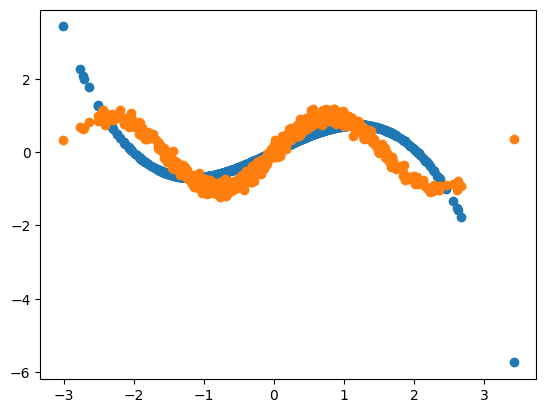

In [9]:
plt.scatter(x, value)
plt.scatter(x, y)

## Basic function

In [2]:
import torch
import math
from torch import nn

In [3]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [116]:
# Fixed Synthesis data
p = torch.tensor([0, 1, 2, 3])
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)+ np.random.normal(0, 0.01, 2000)
y = y.float()
xx = x.unsqueeze(-1).pow(p)
n = len(x)

criterion = torch.nn.MSELoss(reduction='sum')

In [86]:
def loss_fn(output, target, ps, lmda):
    ls = criterion(output, target)
    dm = diag_mat(ps)
    penalty = (lmda/len(target)) * np.sum(np.square(dm @ ps))
    return ls + penalty

In [87]:
def diag_mat(ps):
    dg = np.zeros((len(ps)-1, len(ps)))
    for i in range(len(ps)-1):
        dg[i,i] = -1
        dg[i,i+1]= 1
    return dg

### OLS

In [88]:
modelols = Polynomial3()
optimizer = torch.optim.SGD(modelols.parameters(), lr=1e-6)
for t in range(10000):
    # Forward pass: Compute predicted y by passing x to the modelols
    y_pred = modelols(x)
    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {modelols.string()}')

99 5359.39208984375
199 3643.740478515625
299 2480.973388671875
399 1692.07421875
499 1156.246826171875
599 791.9046630859375
699 543.8883056640625
799 374.86663818359375
899 259.54815673828125
999 180.77955627441406
1099 126.91441345214844
1199 90.03707122802734
1299 64.76104736328125
1399 47.41676712036133
1499 35.501617431640625
1599 27.307010650634766
1699 21.664878845214844
1799 17.775882720947266
1899 15.092405319213867
1999 13.238767623901367
2099 11.957027435302734
2199 11.069825172424316
2299 10.455098152160645
2399 10.0287504196167
2499 9.732769012451172
2599 9.527115821838379
2699 9.384089469909668
2799 9.284536361694336
2899 9.215181350708008
2999 9.166826248168945
3099 9.133086204528809
3199 9.109527587890625
3299 9.093066215515137
3399 9.081554412841797
3499 9.073500633239746
3599 9.067862510681152
3699 9.063912391662598
3799 9.061142921447754
3899 9.059200286865234
3999 9.057838439941406
4099 9.05688190460205
4199 9.0562105178833
4299 9.05573844909668
4399 9.055406570434

### SPLINE

In [89]:
modelsp = Polynomial3()
optimizer = torch.optim.SGD(modelsp.parameters(), lr=1e-6)
lambda2 = 0.5

for t in range(10000):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = modelsp(x)
    
    # parameter space
    param_ls = []
    for param in modelsp.parameters():
        param_ls.append(param.detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = loss_fn(y, y_pred, param_ls, lambda2)

    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f'Result: {modelsp.string()}')

99 3579.9443359375
199 2374.38427734375
299 1576.014892578125
399 1047.249755859375
499 697.0067138671875
599 464.98583984375
699 311.2629699707031
799 209.4020538330078
899 141.89698791503906
999 97.15326690673828
1099 67.49152374267578
1199 47.824493408203125
1299 34.78213882446289
1399 26.131345748901367
1499 20.39220428466797
1599 16.583894729614258
1699 14.056199073791504
1799 12.378164291381836
1899 11.263833999633789
1999 10.523667335510254
2099 10.031866073608398
2199 9.704998016357422
2299 9.487664222717285
2399 9.343118667602539
2499 9.246952056884766
2599 9.182937622070312
2699 9.140311241149902
2799 9.11191463470459
2899 9.092989921569824
2999 9.080368995666504
3099 9.071950912475586
3199 9.06633186340332
3299 9.062578201293945
3399 9.060070991516113
3499 9.058393478393555
3599 9.057271003723145
3699 9.05652141571045
3799 9.05601692199707
3899 9.055679321289062
3999 9.055453300476074
4099 9.05530071258545
4199 9.055197715759277
4299 9.055130004882812
4399 9.055083274841309


### Comparison

In [90]:
predols = modelols(x)
predsp = modelsp(x)

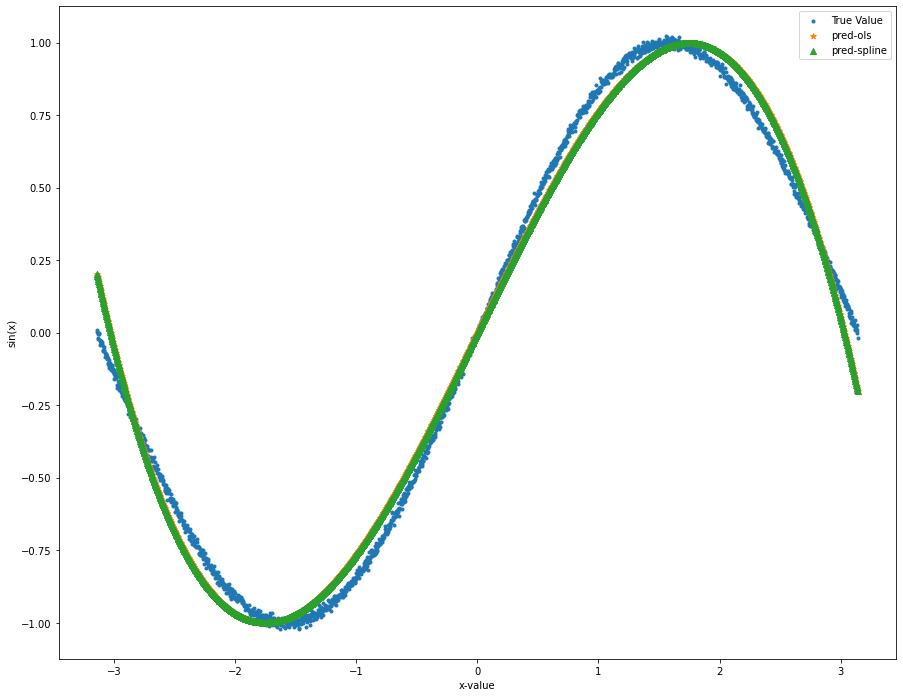

In [91]:
plt.figure(figsize = (15,12))
plt.scatter(x, y, marker = '.', label = 'True Value')
plt.scatter(x, predols.detach().numpy(), marker = '*', label = 'pred-ols')
plt.scatter(x, predsp.detach().numpy(), marker = '^', label = 'pred-spline')

plt.xlabel("x-value")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

## Customized 

In [93]:
class Multilayer(nn.Module):
    def __init__(self, input_sample, output_sample):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu = nn.Sequential(
            nn.Linear(input_sample, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, output_sample),
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu(x)
        return logits
    
    

In [94]:
def loss_fn(output, target, ps, lmda):

    output = torch.reshape(output, (len(target),1))
    ls = criterion(output, target)
    penalty = 0 
    for mat in ps:
        dm = diag_mat(mat)
        penalty += (lmda/len(target)) * np.sum(np.square(dm @ mat))

    return ls + penalty

In [95]:
x = torch.linspace(-math.pi, math.pi, 2000)
x = torch.reshape(x, (n, 1))

multi_model = Multilayer(input_sample = 1, output_sample = 1)
optimizer = torch.optim.SGD(multi_model.parameters(), lr=1e-5)
lambda2 = 0.5

for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = multi_model(x)
    
    # parameter space
    param = list(multi_model.parameters())
    pspace = len(param)
    param_ls = []

    for i in range(pspace-1):
        if i % 2 == 1:
            param_ls.append(param[i].detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = loss_fn(y, y_pred, param_ls, lambda2)

    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#print(f'Result: {multi_model.string()}')
print(f'Result: Done')

99 91.13960266113281
199 39.06160354614258
299 23.721473693847656
399 15.961848258972168
499 11.68567943572998
599 8.980744361877441
699 7.027881145477295
799 5.582798004150391
899 4.512534141540527
999 3.695901870727539
1099 3.0848958492279053
1199 2.6088178157806396
1299 2.2340376377105713
1399 1.9354827404022217
1499 1.6950064897537231
1599 1.4993151426315308
1699 1.33912193775177
1799 1.2067773342132568
1899 1.096971869468689
1999 1.004903793334961
Result: Done


In [96]:
predcus = multi_model(x)

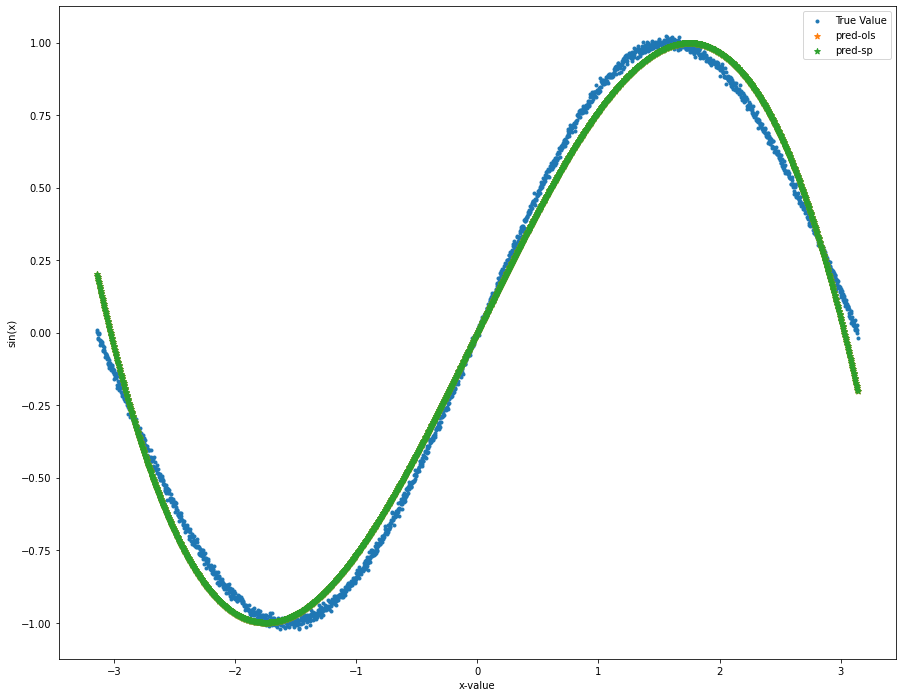

In [97]:
plt.figure(figsize = (15,12))
plt.scatter(x, y, marker = '.', label = 'True Value')
plt.scatter(x, predols.detach().numpy(), marker = '*', label = 'pred-ols')
plt.scatter(x, predsp.detach().numpy(), marker = '*', label = 'pred-sp')
#plt.scatter(x, predcus.detach().numpy(), marker = '*', label = 'pred-lassonet')

plt.xlabel("x-value")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

The plot is consisted of three different experiments with respected to ordinary least square (Poly), the polynomial with customized loss function, and lassonet with customized loss function. According to the previous two experiments, they ran for 10000 loops. As for the last, it only ran 2000 loops and reach better performance.

Runtime:
1. 1.8s (10000 loops)
2. 2.2s (10000 loops)
3. 9.2s (2000 loops)

## RBFN

In [99]:
from typing import Callable
class RBFLayer(nn.Module):
    """
    Defines a Radial Basis Function Layer

    An RBF is defined by 5 elements:
        1. A radial kernel phi
        2. A positive shape parameter epsilon
        3. The number of kernels N, and their relative
           centers c_i, i=1, ..., N
        4. A norm ||.||
        5. A set of weights w_i, i=1, ..., N

    The output of an RBF is given by
    y(x) = sum_{i=1}^N a_i * phi(eps_i * ||x - c_i||)

    For more information check [1,2]

    [1] https://en.wikipedia.org/wiki/Radial_basis_function
    [2] https://en.wikipedia.org/wiki/Radial_basis_function_network

    Parameters
    ----------
        in_features_dim: int
            Dimensionality of the input features
        num_kernels: int
            Number of kernels to use
        out_features_dim: int
            Dimensionality of the output features
        radial_function: Callable[[torch.Tensor], torch.Tensor]
            A radial basis function that returns a tensor of real values
            given a tensor of real values
        norm_function: Callable[[torch.Tensor], torch.Tensor]
            Normalization function applied on the features
        normalization: bool, optional
            if True applies the normalization trick to the rbf layer
        initial_shape_parameter: torch.Tensor, optional
            Sets the shape parameter to the desired value.
        initial_centers_parameter: torch.Tensor, optional
            Sets the centers to the desired value.
        initial_weights_parameters: torch.Tensor, optional
            Sets the weights parameter to the desired value.
        constant_shape_parameter: bool, optional
            Sets the shapes parameters to a non-learnable constant.
            initial_shape_parameter must be different than None if
            constant_shape_parameter is True
        constant_centers_parameter: bool, optional
            Sets the centers to a non-learnable constant.
            initial_centers_parameter must be different than None if
            constant_centers_parameter is True
        constant_weights_parameters: bool, optional
            Sets the weights to a non-learnable constant.
            initial_weights_parameters must be different than None if
            constant_weights_parameters is True
    """

    def __init__(self,
                 in_features_dim: int,
                 num_kernels: int,
                 out_features_dim: int,
                 radial_function: Callable[[torch.Tensor], torch.Tensor],
                 norm_function: Callable[[torch.Tensor], torch.Tensor],
                 normalization: bool = True,
                 initial_shape_parameter: torch.Tensor = None,
                 initial_centers_parameter: torch.Tensor = None,
                 initial_weights_parameters: torch.Tensor = None,
                 constant_shape_parameter: bool = False,
                 constant_centers_parameter: bool = False,
                 constant_weights_parameters: bool = False):
        super(RBFLayer, self).__init__()

        self.in_features_dim = in_features_dim
        self.num_kernels = num_kernels
        self.out_features_dim = out_features_dim
        self.radial_function = radial_function
        self.norm_function = norm_function
        self.normalization = normalization

        self.initial_shape_parameter = initial_shape_parameter
        self.constant_shape_parameter = constant_shape_parameter

        self.initial_centers_parameter = initial_centers_parameter
        self.constant_centers_parameter = constant_centers_parameter

        self.initial_weights_parameters = initial_weights_parameters
        self.constant_weights_parameters = constant_weights_parameters

        assert radial_function is not None  \
            and norm_function is not None
        assert normalization is False or normalization is True

        self._make_parameters()

    def _make_parameters(self) -> None:
        # Initialize linear combination weights
        if self.constant_weights_parameters:
            self.weights = nn.Parameter(
                self.initial_weights_parameters, requires_grad=False)
        else:
            self.weights = nn.Parameter(
                torch.zeros(
                    self.out_features_dim,
                    self.num_kernels,
                    dtype=torch.float32))

        # Initialize kernels' centers
        if self.constant_centers_parameter:
            self.kernels_centers = nn.Parameter(
                self.initial_centers_parameter, requires_grad=False)
        else:
            self.kernels_centers = nn.Parameter(
                torch.zeros(
                    self.num_kernels,
                    self.in_features_dim,
                    dtype=torch.float32))

        # Initialize shape parameter
        if self.constant_shape_parameter:
            self.log_shapes = nn.Parameter(
                self.initial_shape_parameter, requires_grad=False)
        else:
            self.log_shapes = nn.Parameter(
                torch.zeros(self.num_kernels, dtype=torch.float32))

        self.reset()

    def reset(self,
              upper_bound_kernels: float = 1.0,
              std_shapes: float = 0.1,
              gain_weights: float = 1.0) -> None:
        """
        Resets all the parameters.

        Parameters
        ----------
            upper_bound_kernels: float, optional
                Randomly samples the centers of the kernels from a uniform
                distribution U(-x, x) where x = upper_bound_kernels
            std_shapes: float, optional
                Randomly samples the log-shape parameters from a normal
                distribution with mean 0 and std std_shapes
            gain_weights: float, optional
                Randomly samples the weights used to linearly combine the
                output of the kernels from a xavier_uniform with gain
                equal to gain_weights
        """
        if self.initial_centers_parameter is None:
            nn.init.uniform_(
                self.kernels_centers,
                a=-upper_bound_kernels,
                b=upper_bound_kernels)

        if self.initial_shape_parameter is None:
            nn.init.normal_(self.log_shapes, mean=0.0, std=std_shapes)

        if self.initial_weights_parameters is None:
            nn.init.xavier_uniform_(self.weights, gain=gain_weights)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Computes the ouput of the RBF layer given an input vector

        Parameters
        ----------
            input: torch.Tensor
                Input tensor of size B x Fin, where B is the batch size,
                and Fin is the feature space dimensionality of the input

        Returns
        ----------
            out: torch.Tensor
                Output tensor of size B x Fout, where B is the batch
                size of the input, and Fout is the output feature space
                dimensionality
        """

        # Input has size B x Fin
        batch_size = input.size(0)

        # Compute difference from centers
        # c has size B x num_kernels x Fin
        c = self.kernels_centers.expand(batch_size, self.num_kernels,
                                        self.in_features_dim)

        diff = input.view(batch_size, 1, self.in_features_dim) - c

        # Apply norm function; c has size B x num_kernels
        r = self.norm_function(diff)

        # Apply parameter, eps_r has size B x num_kernels
        eps_r = self.log_shapes.exp().expand(batch_size, self.num_kernels) * r

        # Apply radial basis function; rbf has size B x num_kernels
        rbfs = self.radial_function(eps_r)

        # Apply normalization
        # (check https://en.wikipedia.org/wiki/Radial_basis_function_network)
        if self.normalization:
            # 1e-9 prevents division by 0
            rbfs = rbfs / (1e-9 + rbfs.sum(dim=-1)).unsqueeze(-1)

        # Take linear combination
        out = self.weights.expand(batch_size, self.out_features_dim,
                                  self.num_kernels) * rbfs.view(
                                      batch_size, 1, self.num_kernels)

        return out.sum(dim=-1)

    @property
    def get_kernels_centers(self):
        """ Returns the centers of the kernels """
        return self.kernels_centers.detach()

    @property
    def get_weights(self):
        """ Returns the linear combination weights """
        return self.weights.detach()

    @property
    def get_shapes(self):
        """ Returns the shape parameters """
        return self.log_shapes.detach().exp()
    

In [100]:
def l_norm(x, p=2):
    return torch.norm(x, p=p, dim=-1)


# Gaussian RBF
def rbf_gaussian(x):
    return (-x.pow(2)).exp()
    
# Use a radial basis function with euclidean norm
rbf = RBFLayer(in_features_dim=1,            # input features dimensionality
               num_kernels=100,                 # number of kernels
               out_features_dim=1,            # output features dimensionality
               radial_function=rbf_gaussian,  # radial basis function used
               norm_function=l_norm)          # l_norm defines the \ell norm


# Uniformly sample 100 points with 20 features
tx = x

# Compute the output of the RBF layer
# y has shape(100, 2)
ty = rbf(tx)

In [101]:
optimizer = torch.optim.SGD(rbf.parameters(), lr=1e-4)
lambda2 = 0.5

for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred_rbf = rbf(x)
    
    # parameter space
    param = list(rbf.parameters())
    pspace = len(param)
    param_ls = []

    for i in range(pspace-1):
        if i % 2 == 1:
            param_ls.append(param[i].detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = loss_fn(y, y_pred_rbf, param_ls, lambda2)

    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#print(f'Result: {multi_model.string()}')
print(f'Result: Done')

99 572.3881225585938
199 382.56646728515625
299 289.51605224609375
399 227.90359497070312
499 164.60305786132812
599 105.02330780029297
699 58.201351165771484
799 31.49972915649414
899 17.782577514648438
999 10.687960624694824
1099 6.934997081756592
1199 4.879541873931885
1299 3.6977007389068604
1399 2.975395679473877
1499 2.5028181076049805
1599 2.171994686126709
1699 1.9260013103485107
1799 1.7338238954544067
1899 1.5778522491455078
1999 1.4476113319396973
Result: Done


In [102]:
predrbf = rbf(x)

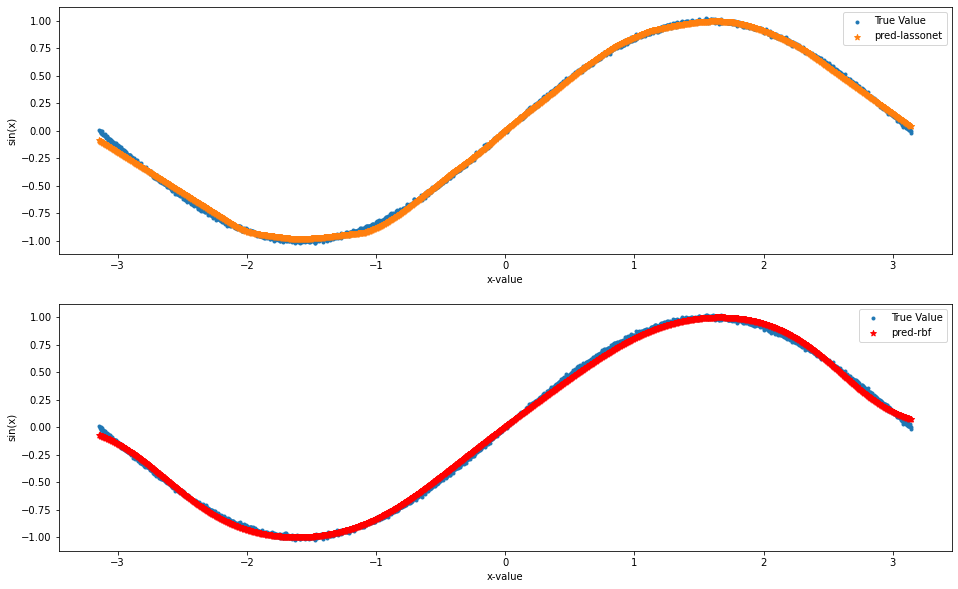

In [103]:
plt.figure(figsize = (16,10))
plt.subplot(2,1,1)
plt.scatter(x, y, marker = '.', label = 'True Value')
plt.scatter(x, predcus.detach().numpy(), marker = '*', label = 'pred-lassonet')
plt.xlabel("x-value")
plt.ylabel("sin(x)")
plt.legend()

plt.subplot(2,1,2)
plt.scatter(x, y, marker = '.', label = 'True Value')
plt.scatter(x, predrbf.detach().numpy(), color = 'r', marker = '*', label = 'pred-rbf')
plt.xlabel("x-value")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

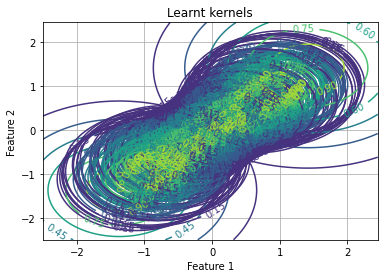

In [104]:


kernels = rbf.get_kernels_centers.numpy()
shapes = rbf.get_shapes.numpy()

def fun(x, y, center, shape):
    diff = center.T - [x, y]
    r = np.linalg.norm(diff, axis=0)
    return np.exp(-(shape * r) ** 2)

x = y = np.arange(-2.5, 2.5, 0.05)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()

for i in range(len(kernels)):
    center = kernels[i][:, None].repeat(10000, axis=1).T
    zs = np.array(fun(X.ravel(), Y.ravel(), center, shapes[i].repeat(10000)))
    Z = zs.reshape(X.shape)

    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Learnt kernels')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid()
plt.show()



## Comparison between layer's difference

In [105]:
class Multilayer(nn.Module):
    def __init__(self, input_sample, output_sample, type = 'single'):
        super().__init__()
        self.flatten = nn.Flatten()
        if type == 'double':
            self.linear_relu = nn.Sequential(
                nn.Linear(input_sample, 100),
                nn.ReLU(),
                nn.Linear(100, 100),
                nn.ReLU(),
                nn.Linear(100, output_sample),
            )
        else:
            self.linear_relu = nn.Sequential(
                nn.Linear(input_sample, 100),
                nn.ReLU(),
                nn.Linear(100, output_sample),
            )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu(x)
        return logits

def loss_fn(output, target, ps, lmda):

    output = torch.reshape(output, (len(target),1))
    ls = criterion(output, target)
    penalty = 0 
    for mat in ps:
        dm = diag_mat(mat)
        penalty += (lmda/len(target)) * np.sum(np.square(dm @ mat))

    return ls + penalty

In [106]:
single_layer_model = Multilayer(input_sample = 1, output_sample = 1, type = 'single')
double_layer_model = Multilayer(input_sample = 1, output_sample = 1, type = 'double')
print('Single Layer Structure: \n', single_layer_model)
print('\n')
print('Double Layer Structure: \n', double_layer_model)


Single Layer Structure: 
 Multilayer(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu): Sequential(
    (0): Linear(in_features=1, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=1, bias=True)
  )
)


Double Layer Structure: 
 Multilayer(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu): Sequential(
    (0): Linear(in_features=1, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=1, bias=True)
  )
)


### Single Layer

#### with Penalty

In [238]:
x = torch.linspace(-math.pi, math.pi, 2000)
x = torch.reshape(x, (n, 1))

single_layer_model = Multilayer(input_sample = 1, output_sample = 1, type = 'single')
optimizer = torch.optim.SGD(single_layer_model.parameters(), lr=1e-5)
lambda2 = 0.5
iteration = 10000
sploss_list = []
tor = 1e-5

for t in range(iteration):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = single_layer_model(x)
    
    # parameter space
    param = list(single_layer_model.parameters())
    pspace = len(param)
    param_ls = []

    for i in range(pspace-1):
        if i % 2 == 1:
            param_ls.append(param[i].detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = loss_fn(y, y_pred, param_ls, lambda2)
    sploss_list.append(loss.item())
    
    if t % 1000 == 0:
        print(t, loss.item())
    if (t > 0) and ((sploss_list[t-1]-sploss_list[t])<1e-3):
        print('Convergence')
        break
        
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#print(f'Result: {multi_model.string()}')
print(f'Result: Done')
print('MSE: ', np.round(criterion(torch.reshape(y, (-1,1)), y_pred).item(),4))

0 1432.1292724609375
1000 7.730321407318115
2000 2.6252059936523438
Convergence
Result: Done
MSE:  1.5256


#### without penalty

In [239]:
x = torch.linspace(-math.pi, math.pi, 2000)
x = torch.reshape(x, (n, 1))

single_layer_model = Multilayer(input_sample = 1, output_sample = 1, type = 'single')
optimizer = torch.optim.SGD(single_layer_model.parameters(), lr=1e-5)
lambda2 = 0.5
iteration = 10000
sloss_list = []
tor = 1e-5

for t in range(iteration):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = single_layer_model(x)
    
    # parameter space
    param = list(single_layer_model.parameters())
    pspace = len(param)
    param_ls = []

    for i in range(pspace-1):
        if i % 2 == 1:
            param_ls.append(param[i].detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = criterion(torch.reshape(y, (-1,1)), y_pred)
    sloss_list.append(loss.item())
    
    if t % 1000 == 0:
        print(t, loss.item())
    if (t > 0) and ((sloss_list[t-1]-sloss_list[t])<1e-3):
        print('Convergence')
        break
        
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#print(f'Result: {multi_model.string()}')
print(f'Result: Done')
print('MSE: ', np.round(criterion(torch.reshape(y, (-1,1)), y_pred).item(),4))

0 1391.8798828125
1000 7.96391487121582
2000 2.823611259460449
Convergence
Result: Done
MSE:  1.6768


### Double Layer

#### with Penalty

In [240]:
x = torch.linspace(-math.pi, math.pi, 2000)
x = torch.reshape(x, (n, 1))

double_layer_model = Multilayer(input_sample = 1, output_sample = 1, type = 'double')
optimizer = torch.optim.SGD(double_layer_model.parameters(), lr=1e-5)
lambda2 = 0.5
iteration = 10000
dploss_list = []
tor = 1e-5

for t in range(iteration):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = double_layer_model(x)
    
    # parameter space
    param = list(double_layer_model.parameters())
    pspace = len(param)
    param_ls = []

    for i in range(pspace-1):
        if i % 2 == 1:
            param_ls.append(param[i].detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = loss_fn(y, y_pred, param_ls, lambda2)
    dploss_list.append(loss.item())
    
    if t % 1000 == 0:
        print(t, loss.item())
    if (t > 0) and ((dploss_list[t-1]-dploss_list[t])<1e-3):
        print('Convergence')
        break

    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#print(f'Result: {multi_model.string()}')
print(f'Result: Done')
print('MSE: ', np.round(criterion(torch.reshape(y, (-1,1)), y_pred).item(),4))

0 1383.3095703125
1000 3.026266098022461
Convergence
Result: Done
MSE:  0.9312


#### without penalty

In [242]:
x = torch.linspace(-math.pi, math.pi, 2000)
x = torch.reshape(x, (n, 1))

double_layer_model = Multilayer(input_sample = 1, output_sample = 1, type = 'double')
optimizer = torch.optim.SGD(double_layer_model.parameters(), lr=1e-5)
lambda2 = 0.5
iteration = 10000
dloss_list = []
tor = 1e-5

for t in range(iteration):
    # Forward pass: Compute predicted y by passing x to the modelsp
    y_pred = double_layer_model(x)

    # parameter space
    param = list(double_layer_model.parameters())
    pspace = len(param)
    param_ls = []

    for i in range(pspace-1):
        if i % 2 == 1:
            param_ls.append(param[i].detach().numpy())
    param_ls = np.array(param_ls)

    # Compute and print loss
    loss = criterion(torch.reshape(y, (-1,1)), y_pred)
    dloss_list.append(loss.item())
    
    if t % 1000 == 0:
        print(t, loss.item())
    if (t > 0) and ((dloss_list[t-1]-dloss_list[t])<1e-3):
        print('Convergence')
        break

    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#print(f'Result: {multi_model.string()}')
print(f'Result: Done')
print('MSE: ', np.round(criterion(torch.reshape(y, (-1,1)), y_pred).item(),4))

0 1141.671142578125
1000 2.0585055351257324
Convergence
Result: Done
MSE:  1.0085


### Result for fake data

In [243]:
max_epoch = max(len(sloss_list),len(sploss_list),len(dloss_list),len(dploss_list))
empty_list = np.array([[0]*max_epoch,[0]*max_epoch,[0]*max_epoch,[0]*max_epoch])
empty_list = empty_list.astype(np.float64)

empty_list[0,:len(sloss_list)] = sloss_list
empty_list[1,:len(sploss_list)] = sploss_list
empty_list[2,:len(dloss_list)] = dloss_list
empty_list[3,:len(dploss_list)] = dploss_list

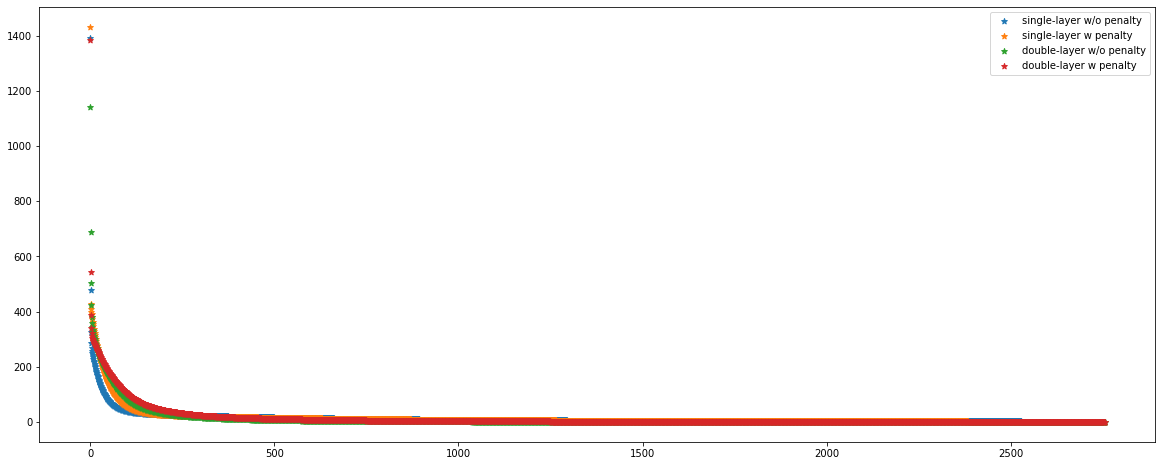

In [244]:
plt.figure(figsize=(20,8))
plt.scatter(np.arange(0,max_epoch), empty_list[0,:], marker = '*', label = 'single-layer w/o penalty')
plt.scatter(np.arange(0,max_epoch), empty_list[1,:], marker = '*', label = 'single-layer w penalty')
plt.scatter(np.arange(0,max_epoch), empty_list[2,:], marker = '*', label = 'double-layer w/o penalty')
plt.scatter(np.arange(0,max_epoch), empty_list[3,:], marker = '*', label = 'double-layer w penalty')
plt.legend()
plt.show()

In [251]:
myTable = PrettyTable(["Method", "Penalty", "Tolerance", "MSE", "Converge Epoch", 'Best Model']) 
# Add rows 
myTable.add_row(["Single Layer", "X", "1e-5", 1.5256, len(sloss_list), '']) 
myTable.add_row(["Single Layer", "O", "1e-5", 1.6768, len(sploss_list), '']) 
myTable.add_row(["Double Layer", "X", "1e-5", 1.0085, len(dloss_list), '']) 
myTable.add_row(["Double Layer", "O", "1e-5", 0.9312, len(dploss_list), 'V']) 
 
print(myTable)


+--------------+---------+-----------+--------+----------------+------------+
|    Method    | Penalty | Tolerance |  MSE   | Converge Epoch | Best Model |
+--------------+---------+-----------+--------+----------------+------------+
| Single Layer |    X    |    1e-5   | 1.5256 |      2756      |            |
| Single Layer |    O    |    1e-5   | 1.6768 |      2709      |            |
| Double Layer |    X    |    1e-5   | 1.0085 |      1542      |            |
| Double Layer |    O    |    1e-5   | 0.9312 |      1789      |     V      |
+--------------+---------+-----------+--------+----------------+------------+
